In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(title, image):
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

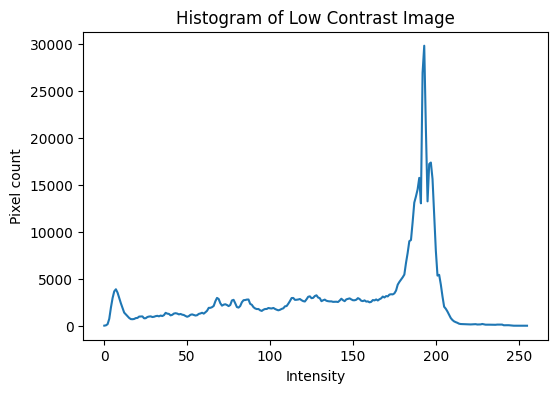

In [4]:
#khao sat histogram
img = cv2.imread("low_contrast.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

plt.figure(figsize=(6,4))
plt.plot(hist)
plt.title("Histogram of Low Contrast Image")
plt.xlabel("Intensity")
plt.ylabel("Pixel count")
plt.show()


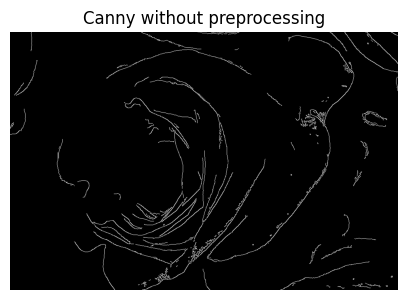

In [5]:
#canny trước khi tăng contrast
low=60
high=120
edges_raw = cv2.Canny(gray, low, high)
show("Canny without preprocessing", edges_raw)


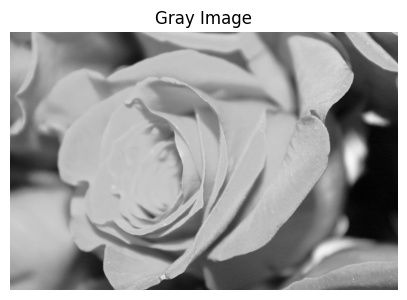

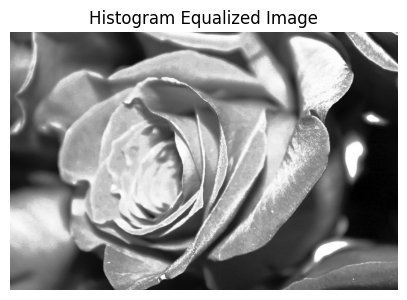

In [6]:
#tang tuong phan
equalized = cv2.equalizeHist(gray)
show("Gray Image", gray)
show("Histogram Equalized Image", equalized)


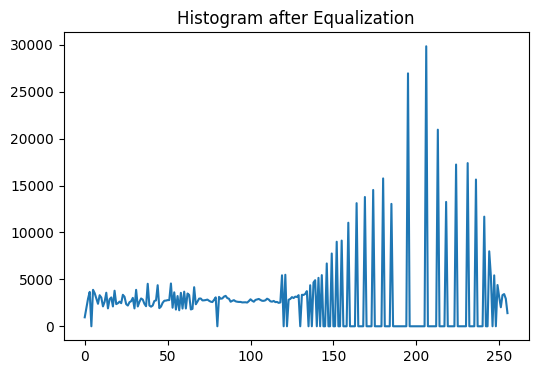

In [7]:
#khảo sát lại histogram sau khi tăng contrast
hist_eq = cv2.calcHist([equalized], [0], None, [256], [0, 256])

plt.figure(figsize=(6,4))
plt.plot(hist_eq)
plt.title("Histogram after Equalization")
plt.show()


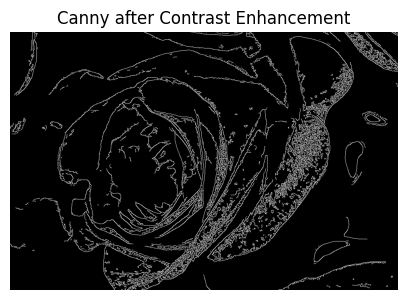

In [18]:
#canny sau khi tăng contrast
low_thresh = 60
high_thresh = 120

edges_eq = cv2.Canny(equalized, low_thresh, high_thresh)
show("Canny after Contrast Enhancement", edges_eq)


ĐÁNH GIÁ KẾT QUẢ

Với ảnh có độ tương phản thấp thì các pixel tập trung ở một dải hẹp nên sự khác biệt cường độ gữa các vùng không rõ rệt, nhiều biên bị bỏ sót. Sau khi tăng tương phản thì giải cường độ trên histogram được kéo giãn giúp gradient tại các biên tăng lên. Kết quả Canny cho thấy số lượng biên được phát hiện tăng lên rõ rệt và các đường biên liên tục hơn.